In [20]:
# Importing files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl

aapl = pd.read_csv('data/aapl_ohlc.csv', header=0, index_col='Date', parse_dates=True)

In [21]:
# Just some general info on AAPL before delving into visualization
display(aapl.index)
display(aapl.columns)
display(aapl.describe())
display(aapl.resample('M').mean().tail())

DatetimeIndex(['2006-10-02', '2006-10-03', '2006-10-04', '2006-10-05',
               '2006-10-06', '2006-10-09', '2006-10-10', '2006-10-11',
               '2006-10-12', '2006-10-13',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=2830, freq=None)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,2830.000000,2830.000000,2830.000000,2830.000000,2.830000e+03,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2830.000000,2.830000e+03
mean,247.160512,249.603774,244.377169,247.054279,2.900446e+07,0.010767,1.002120,64.521283,65.096799,63.892906,64.512719,1.247352e+08
std,170.340590,171.684048,168.711992,170.202391,1.831010e+07,0.160208,0.112787,43.274181,43.545172,42.994156,43.282892,9.906652e+07
min,73.420000,73.980000,72.600000,73.230000,5.624800e+06,0.000000,1.000000,9.435493,9.507461,9.330112,9.411076,1.147592e+07
25%,113.862500,115.000000,112.705000,113.927500,1.589840e+07,0.000000,1.000000,23.821665,24.015400,23.392428,23.778934,5.036141e+07
50%,163.520000,165.330000,160.440000,162.980000,2.448481e+07,0.000000,1.000000,57.645805,58.491544,57.052814,57.743997,9.986585e+07
75%,374.250000,378.927500,370.297500,374.855000,3.685698e+07,0.000000,1.000000,97.298248,98.113024,96.553987,97.584609,1.673472e+08
max,702.410000,705.070000,699.570000,702.100000,1.895606e+08,3.290000,7.000000,175.110000,177.200000,174.860000,176.420000,8.432424e+08


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-08-31,159.032727,160.207627,157.855005,159.029091,2.801595e+07,0.028636,1.0,158.860182,160.033553,157.683690,158.856375,2.801595e+07
2017-09-30,158.133000,158.869445,156.446250,157.606500,3.347970e+07,0.000000,1.0,158.133000,158.869445,156.446250,157.606500,3.347970e+07
2017-10-31,157.355682,158.586791,156.670223,157.811627,2.255160e+07,0.000000,1.0,157.355682,158.586791,156.670223,157.811627,2.255160e+07
2017-11-30,172.433750,173.287235,170.823795,172.214500,2.787335e+07,0.000000,1.0,172.433750,173.287235,170.823795,172.214500,2.787335e+07
2017-12-31,171.722000,172.885935,170.848500,171.893100,2.592800e+07,0.000000,1.0,171.722000,172.885935,170.848500,171.893100,2.592800e+07


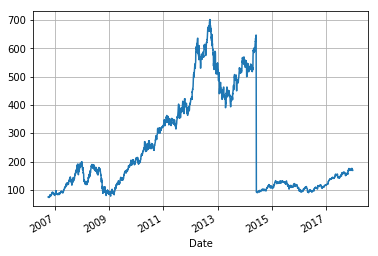

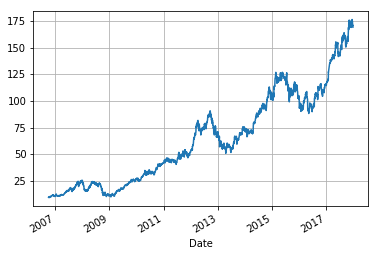

In [22]:
# Displaying Close prices in Time Series chart
aapl['Close'].plot(grid=True)
plt.show()
aapl['Adj. Close'].plot(grid=True)
plt.show()

In [24]:
# Get sub-dataframe containing adjusted close prices
daily_close = aapl[['Adj. Close']]

# Daily percentage change from previous price
daily_pct_change = daily_close.pct_change()
daily_pct_change.fillna(0, inplace=True)
daily_log_returns = np.log(daily_close.pct_change() + 1)

display(daily_log_returns.tail())

,Adj. Close
Date,
2017-12-22,0.000000
2017-12-26,-0.025697
2017-12-27,0.000176
2017-12-28,0.002810
2017-12-29,-0.010873
